Nama  : Naovi Magfiroh 

NIM   : 20090125 

Kelas : Ular



## Langkah 1 (Problem Solving)

Indeks Pembangunan Manusia (IPM) adalah mengukur capaian pembangunan manusia berbasis sejumlah komponen dasar kualitas hidup. IPM digunakan sebagai indikator untuk
menilai aspek kualitas dari pembangunan dan untuk mengklasifikasikan apakah  indeks pembangunan manusia tergolong kedalam very high,high,normal,atau low.

Pada Ujian Praktek Data Science ini,saya menggunakan dataset IPM.Didalam dataset terdapat 4 variabel yang bisa dikelola antara lain Harapan Lama Sekolah,Pengeluaran Perkapita,Rerata Lama Sekolah,dan Usia Harapan Hidup.Dari keempat variabel tersebut,Saya akan mengelompokkan jenis IPM yaitu very high,high,normal dan low.

Saya akan menggunakan Algoritma Mechine Learning yaitu klasifikasi random forest(perbandingan entropy dan gini) dan klasifikasi K-Nearest Neighbors pada Indeks Pembangunan Masyarakat.


## Langkah 2 (Data Acquisition)

Pertama-tama,kita import terlebih dahulu library yang akan digunakan.

Import Library

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

Import Dataset

Data IPM yang saya gunakan diperoleh dari Orbit Future Academy dengan format csv.

In [553]:
dataIPM = pd.read_csv('IPM.csv')

Panggil data IPM yang sudah dibuat seperti dibawah ini

In [554]:
dataIPM

,Harapan_Lama_Sekolah,Pengeluaran_Perkapita,Rerata_Lama_Sekolah,Usia_Harapan_Hidup,IPM
0,14.36,9572,9.37,69.96,High
1,13.90,7148,9.48,65.28,Normal
2,14.32,8776,8.68,67.43,Normal
3,14.60,8180,8.88,64.40,Normal
4,14.01,8030,9.67,68.22,Normal
...,...,...,...,...,...
2191,10.13,5522,4.91,65.32,Low
2192,7.11,5440,2.51,65.26,Low
2193,9.79,4761,2.99,64.83,Low
2194,14.99,14922,11.30,70.15,High


## Langkah 3 (Data Exploration)

Melakukan proses Menampilkan 5 data IPM teratas

In [555]:
dataIPM.head()

,Harapan_Lama_Sekolah,Pengeluaran_Perkapita,Rerata_Lama_Sekolah,Usia_Harapan_Hidup,IPM
0,14.36,9572,9.37,69.96,High
1,13.90,7148,9.48,65.28,Normal
2,14.32,8776,8.68,67.43,Normal
3,14.60,8180,8.88,64.40,Normal
4,14.01,8030,9.67,68.22,Normal


Melakukan proses Menampilkan 5 data IPM terbawah

In [556]:
dataIPM.tail()

,Harapan_Lama_Sekolah,Pengeluaran_Perkapita,Rerata_Lama_Sekolah,Usia_Harapan_Hidup,IPM
2191,10.13,5522,4.91,65.32,Low
2192,7.11,5440,2.51,65.26,Low
2193,9.79,4761,2.99,64.83,Low
2194,14.99,14922,11.30,70.15,High
2195,12.91,11059,8.17,71.20,High


Melakukan proses pengecekan dimensi pada data IPM

In [557]:
dataIPM.shape

(2196, 5)

Setelah dicek,data IPM terdiri dari 2196 data dengan jumlah kolom 5

Melakukan proses pengecekan apakah terdapat data IPM yang duplikat

In [558]:
dataIPM.duplicated().sum()

0

Setelah dicek,data IPM tidak ada data yang duplikat(0)

Melakukan proses pengecekan apakah terdapat data IPM yang eror

In [559]:
dataIPM.isnull().sum()

Harapan_Lama_Sekolah     0
Pengeluaran_Perkapita    0
Rerata_Lama_Sekolah      0
Usia_Harapan_Hidup       0
IPM                      0
dtype: int64

Setelah dicek,data IPM tidak ada data yang eror

Melakukan proses melihat informasi pada data IPM

In [560]:
dataIPM.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2196 entries, 0 to 2195
Data columns (total 5 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Harapan_Lama_Sekolah   2196 non-null   float64
 1   Pengeluaran_Perkapita  2196 non-null   int64  
 2   Rerata_Lama_Sekolah    2196 non-null   float64
 3   Usia_Harapan_Hidup     2196 non-null   float64
 4   IPM                    2196 non-null   object 
dtypes: float64(3), int64(1), object(1)
memory usage: 85.9+ KB


Bisa kita lihat,bahwa data IPM terdiri dari 2196 data dengan jumlah kolom 5 antara lain harapan lama sekolah dengan tipe data float,pengeluaran perkapita dengan tipe data integer,rerata lama sekolah dengan tipe data float,usia harapan hidup dengan tipe data float,dan IPM dengan tipe data object.

Melakukan proses melihat dekripsi pada data IPM

In [561]:
dataIPM.describe()

,Harapan_Lama_Sekolah,Pengeluaran_Perkapita,Rerata_Lama_Sekolah,Usia_Harapan_Hidup
count,2196.000000,2196.000000,2196.000000,2196.000000
mean,12.931498,10323.144353,8.291585,69.467418
std,1.312967,2664.738311,1.611256,3.437536
min,2.950000,3975.000000,0.850000,54.820000
25%,12.350000,8599.750000,7.390000,67.210000
50%,12.860000,10192.500000,8.180000,69.785000
75%,13.570000,11670.500000,9.180000,71.712500
max,17.800000,23888.000000,12.830000,77.730000


Melakukan proses pengecekan apakah terdapat data unik pada data IPM 

In [562]:
dataIPM.nunique()

Harapan_Lama_Sekolah      499
Pengeluaran_Perkapita    1930
Rerata_Lama_Sekolah       633
Usia_Harapan_Hidup       1054
IPM                         4
dtype: int64

Setelah dicek,ternyata terdapat banyak data unik karena pada variabel harapan lama sekolah,pengeluaran perkapita,rerata lama sekolah,dan usia harapan hidup menggunakan data numerik sehingga hasilnya pun bervariasi.Beda halnya dengan variabel IPM yang menggunakan data kategorik sehingga mempunyai 4 data unik yaitu very high,high,normal,dan low.

VISUALISASI DATA

Plot untuk jumlah IPM terbanyak berdasarkan total seluruh data menggunakan histogram

<AxesSubplot:xlabel='IPM', ylabel='Count'>

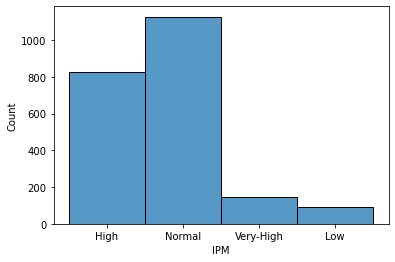

In [563]:
sns.histplot(data=dataIPM, x= "IPM")

Dari data IPM,dapat disimpulkan bahwa mayoritas data IPM tergolong kedalam kategori normal dengan total data berkisar 1200.

Plot untuk jumlah IPM terbanyak berdasarkan total seluruh data dalam persentase menggunakan pie

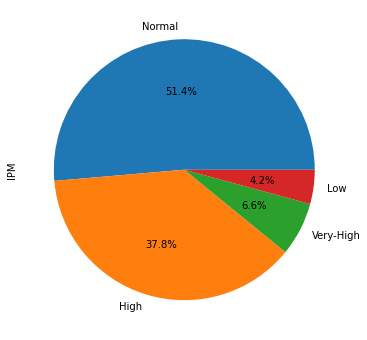

In [564]:
plt.figure(figsize=(15,6))
dataIPM['IPM'].value_counts().plot(kind='pie',autopct='%1.1f%%')
plt.show()

Dan setelah dilakukan persentase total jumlah kategori normal sebesar 51.45%, high 37.8%, very high 6.6% dan low 4.2%

Melakukan proses melihat nilai kategori dari tiap variabel

In [565]:
for i in dataIPM.columns:
  print(dataIPM[i].unique())

[14.36 13.9  14.32 14.6  14.01 13.04 14.28 14.61 14.73 14.47 14.84 14.71
 13.65 13.78 13.76 14.14 13.99 13.47 14.97 17.8  14.13 15.63 15.21 14.62
 13.27 12.84 13.61 13.35 13.07 13.7  13.46 12.74 12.61 12.79 13.11 12.77
 13.36 13.24 12.27 13.29 13.87 13.48 12.64 13.01 13.19 12.95 13.28 12.62
 14.57 12.73 14.75 13.63 14.56 13.75 14.09 12.89 13.33 13.05 12.38 14.34
 13.68 13.88 13.3  12.81 12.72 12.44 16.53 14.33 13.18 15.07 14.98 14.27
 14.55 13.34 12.46 11.93 12.41 13.55 12.85 12.88 12.76 12.83 15.55 13.31
 12.04 12.28 12.93 12.17 12.63 15.37 14.8  12.54 11.68 11.98 12.35 12.19
 12.29 11.77 11.76 12.45 12.31 12.07 11.58 14.42 12.92 13.38 13.67 13.62
 13.93 13.06 12.58 13.12 16.03 12.26 12.52 12.86 12.49 12.37 11.95 12.59
 11.64 12.06 12.   14.7  12.78 11.86 11.7  12.1  11.38 11.63 13.16 12.98
 12.57 13.26 13.91 13.17 13.96 12.24 12.7  12.03 14.2  12.23 11.71 12.12
 13.1  11.88 12.08 13.42 13.58 14.21 13.13 14.1  13.81 13.03 13.51 12.55
 13.39 13.84 12.5  13.69 12.94 13.32 12.32 12.96 12

Melakukan proses melihat nilai frekuensi tiap kategori dari variabel data IPM

In [566]:
for i in dataIPM.columns:
  print(dataIPM[i].value_counts())

12.83    20
12.48    17
12.89    16
12.84    15
12.81    15
         ..
10.83     1
16.53     1
8.89      1
10.47     1
17.60     1
Name: Harapan_Lama_Sekolah, Length: 499, dtype: int64
7980     4
11318    4
13281    4
10454    3
11994    3
        ..
10868    1
14968    1
8825     1
15696    1
12290    1
Name: Pengeluaran_Perkapita, Length: 1930, dtype: int64
7.86     14
8.51     11
7.92     11
7.85     11
8.52     11
         ..
6.20      1
11.32     1
3.20      1
4.77      1
6.57      1
Name: Rerata_Lama_Sekolah, Length: 633, dtype: int64
71.60    9
71.18    8
70.18    8
70.73    8
71.40    7
        ..
70.90    1
60.66    1
62.83    1
62.52    1
69.50    1
Name: Usia_Harapan_Hidup, Length: 1054, dtype: int64
Normal       1128
High          829
Very-High     146
Low            93
Name: IPM, dtype: int64


TARGET DATA

Menghapus variabel IPM dari dataset yang masuk sebagai variabel X dan inisialisasi variabel IPM sebagai variabel y

In [567]:
X = dataIPM.drop(['IPM'],axis = 1)
y = dataIPM['IPM']

Melakukan split data untuk menjadikan data IPM menjadi data trainning 80 % dan data testing sebesar 20 % dengan pemilihan random data sebesar 42.

In [568]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)
X_train.shape, X_test.shape

((1756, 4), (440, 4))

## Langkah 4 (Modelling)

# Random Forest

Melakukan proses pembuatan model Random forest dengan estimator 60 menggunakan kategori entropy

In [569]:
model_randomforest = RandomForestClassifier(n_estimators=60, criterion="entropy")

Modelling random forest dengan pengambilan data trainning

In [570]:
model_randomforest.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', n_estimators=60)

Inisialisasi hasil prediksi model Random Forest kategori entropy  dari data trainning dengan nama y_pred1 dan data testing dengan nama y_pred2

In [571]:
y_pred1 = model_randomforest.predict(X_train)
y_pred2= model_randomforest.predict(X_test)


Melakukan proses pembuatan model Random forest dengan estimator 60 menggunakan kategori gini

In [572]:
model_randomforest = RandomForestClassifier(n_estimators=60, criterion="gini")

Modelling random forest dengan pengambilan data trainning

In [573]:
model_randomforest.fit(X_train, y_train)

RandomForestClassifier(n_estimators=60)

Inisialisasi hasil prediksi model Random Forest kategori gini dari data trainning dengan nama y_pred3 dan data testing dengan nama y_pred4

In [574]:
y_pred3 = model_randomforest.predict(X_train)
y_pred4= model_randomforest.predict(X_test)


## K-Nearest Neighbor

Melakukan proses pembuatan model KNN dengan neighbors 6

In [575]:
model_knn = KNeighborsClassifier(n_neighbors=6)
model_knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=6)

Inisialisasi hasil prediksi model K-Nearest Neighbors dari data trainning dengan nama y_pred5 dan data testing dengan nama y_pred6

In [576]:
y_pred5 = model_knn.predict(X_train)
y_pred6= model_knn.predict(X_test)


## Langkah 5 (Evaluation)

Melakukan Evaluasi untuk model random forest kategori entrophy data trainning dengan pemanggilan data y_pred1

In [577]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
result = confusion_matrix(y_train, y_pred1)
print("Confusion Matrix:")
print(result)
result1 = classification_report(y_train, y_pred1)
print("\nClassification Report Training Model (Random Forest Entrophy) :",)
print (result1)

Confusion Matrix:
[[665   0   0   0]
 [  0  77   0   0]
 [  0   0 901   0]
 [  0   0   0 113]]

Classification Report Training Model (Random Forest Entrophy) :
              precision    recall  f1-score   support

        High       1.00      1.00      1.00       665
         Low       1.00      1.00      1.00        77
      Normal       1.00      1.00      1.00       901
   Very-High       1.00      1.00      1.00       113

    accuracy                           1.00      1756
   macro avg       1.00      1.00      1.00      1756
weighted avg       1.00      1.00      1.00      1756



Melakukan Evaluasi untuk model random forest kategori entrophy data testing dengan pemanggilan data y_pred2

In [578]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
result = confusion_matrix(y_test, y_pred2)
print("Confusion Matrix:")
print(result)
result1 = classification_report(y_test, y_pred2)
print("\nClassification Report Testing Model (Random Forest Entrophy) :",)
print (result1)

Confusion Matrix:
[[158   0   3   3]
 [  0  16   0   0]
 [  7   0 220   0]
 [  1   0   0  32]]

Classification Report Testing Model (Random Forest Entrophy) :
              precision    recall  f1-score   support

        High       0.95      0.96      0.96       164
         Low       1.00      1.00      1.00        16
      Normal       0.99      0.97      0.98       227
   Very-High       0.91      0.97      0.94        33

    accuracy                           0.97       440
   macro avg       0.96      0.98      0.97       440
weighted avg       0.97      0.97      0.97       440



Melakukan Evaluasi untuk model random forest kategori gini data trainning dengan pemanggilan data y_pred3

In [579]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
result = confusion_matrix(y_train, y_pred3)
print("Confusion Matrix:")
print(result)
result1 = classification_report(y_train, y_pred3)
print("\nClassification Report Training Model (Random Forest Gini) :",)
print (result1)

Confusion Matrix:
[[665   0   0   0]
 [  0  77   0   0]
 [  0   0 901   0]
 [  0   0   0 113]]

Classification Report Training Model (Random Forest Gini) :
              precision    recall  f1-score   support

        High       1.00      1.00      1.00       665
         Low       1.00      1.00      1.00        77
      Normal       1.00      1.00      1.00       901
   Very-High       1.00      1.00      1.00       113

    accuracy                           1.00      1756
   macro avg       1.00      1.00      1.00      1756
weighted avg       1.00      1.00      1.00      1756



Melakukan Evaluasi untuk model random forest kategori gini data testing dengan pemanggilan data y_pred4

In [580]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
result = confusion_matrix(y_test, y_pred4)
print("Confusion Matrix:")
print(result)
result1 = classification_report(y_test, y_pred4)
print("\nClassification Report Testing Model (Random Forest Gini) :",)
print (result1)

Confusion Matrix:
[[161   0   2   1]
 [  0  15   1   0]
 [  5   0 222   0]
 [  1   0   0  32]]

Classification Report Testing Model (Random Forest Gini) :
              precision    recall  f1-score   support

        High       0.96      0.98      0.97       164
         Low       1.00      0.94      0.97        16
      Normal       0.99      0.98      0.98       227
   Very-High       0.97      0.97      0.97        33

    accuracy                           0.98       440
   macro avg       0.98      0.97      0.97       440
weighted avg       0.98      0.98      0.98       440



Melakukan Evaluasi untuk model k-nearest neighbors data trainning dengan pemanggilan data y_pred5

In [581]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
result = confusion_matrix(y_train, y_pred5)
print("Confusion Matrix:")
print(result)
result1 = classification_report(y_train, y_pred5)
print("\nClassification Report Training Model (K-Nearest Neighbors) :",)
print (result1)

Confusion Matrix:
[[585   0  68  12]
 [  0  62  15   0]
 [161   6 734   0]
 [ 27   0   0  86]]

Classification Report Training Model (K-Nearest Neighbors) :
              precision    recall  f1-score   support

        High       0.76      0.88      0.81       665
         Low       0.91      0.81      0.86        77
      Normal       0.90      0.81      0.85       901
   Very-High       0.88      0.76      0.82       113

    accuracy                           0.84      1756
   macro avg       0.86      0.82      0.83      1756
weighted avg       0.84      0.84      0.84      1756



Melakukan Evaluasi untuk model k-nearest neighbors data testing dengan pemanggilan data y_pred6

In [582]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
result = confusion_matrix(y_test, y_pred6)
print("Confusion Matrix:")
print(result)
result1 = classification_report(y_test, y_pred6)
print("\nClassification Report Testing Model (K-Nearest Neighbors) :",)
print (result1)

Confusion Matrix:
[[138   0  23   3]
 [  0  12   4   0]
 [ 51   2 174   0]
 [  8   0   0  25]]

Classification Report Testing Model (K-Nearest Neighbors) :
              precision    recall  f1-score   support

        High       0.70      0.84      0.76       164
         Low       0.86      0.75      0.80        16
      Normal       0.87      0.77      0.81       227
   Very-High       0.89      0.76      0.82        33

    accuracy                           0.79       440
   macro avg       0.83      0.78      0.80       440
weighted avg       0.81      0.79      0.80       440



## Langkah 6 (Deployment)

Deployment adalah kegiatan yang bertujuan untuk menyebarkan aplikasi yang telah dikerjakan oleh para pengembang. Penyebarannya dapat melalui beragam cara tergantung dari jenis aplikasinya.Model yang sudah jadi akan saya deployment menggunakan Heroku.